In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [14]:
X_train = pd.read_csv('train_Int_MM_PCA10.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.412651,0.084070,0.282497,-0.393422,-0.096729,0.393599,-0.103436,0.098373,-0.313217,-0.013963
1,-0.177765,0.031694,0.220924,0.010606,-0.042096,-0.534258,0.271329,0.394487,-0.065318,0.194361
2,0.075381,-0.140127,-0.233611,0.085018,-0.253664,-0.209153,-0.191823,0.494242,-0.014001,-0.162745
3,0.598926,-0.202996,0.054273,-0.085612,0.062239,0.238759,-0.549828,-0.151805,0.010526,0.218146
4,0.089788,-0.029277,0.082159,-0.036563,-0.274682,-0.538689,-0.136742,-0.148616,0.186355,-0.124186


In [15]:
X_validation = pd.read_csv('valid_Int_MM_PCA10.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4000 non-null   float64
 1   PC2     4000 non-null   float64
 2   PC3     4000 non-null   float64
 3   PC4     4000 non-null   float64
 4   PC5     4000 non-null   float64
 5   PC6     4000 non-null   float64
 6   PC7     4000 non-null   float64
 7   PC8     4000 non-null   float64
 8   PC9     4000 non-null   float64
 9   PC10    4000 non-null   float64
dtypes: float64(10)
memory usage: 312.6 KB


In [16]:
X_test = pd.read_csv('test_Int_MM_PCA10.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [17]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [18]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(10, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [19]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [20]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [21]:
print(X_training.shape)

(12000, 10)


Training Losses for hidden layer 8
          0
0  0.214202
1  0.209565
2  0.204986
3  0.200466
4  0.196006
 RMSE for validation set is : 0.12778057260396727
 RMSE for test set is : 0.12558726106839077
Training Losses for hidden layer 16
          0
0  0.079894
1  0.075151
2  0.070604
3  0.066257
4  0.062112
 RMSE for validation set is : 0.12784629753826982
 RMSE for test set is : 0.12562691419006608
Training Losses for hidden layer 32
          0
0  0.061482
1  0.054497
2  0.048198
3  0.042596
4  0.037693
 RMSE for validation set is : 0.12783242670730957
 RMSE for test set is : 0.12560409367193767
Training Losses for hidden layer 64
          0
0  0.033471
1  0.026863
2  0.022671
3  0.020754
4  0.020668
 RMSE for validation set is : 0.12784929151700508
 RMSE for test set is : 0.12560534675792712
Training Losses for hidden layer 128
          0
0  0.415709
1  0.338210
2  0.269440
3  0.209500
4  0.158400
 RMSE for validation set is : 0.12780652414636023
 RMSE for test set is : 0.12559988

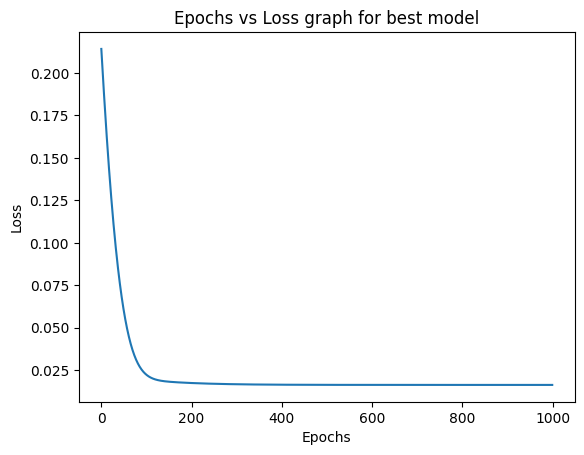

In [22]:
nuerons = [8,16,32,64,128]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [23]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(10, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.194176
1  0.188623
2  0.183158
3  0.177783
4  0.172498
 RMSE for validation set is : 0.12852919225763704
 RMSE for test set is : 0.1260687690224798
Training Losses for hidden layer 16
          0
0  0.019775
1  0.019760
2  0.019755
3  0.019720
4  0.019718
 RMSE for validation set is : 0.1277115177270407
 RMSE for test set is : 0.12545257832309106
Training Losses for hidden layer 32
          0
0  0.030957
1  0.026979
2  0.023889
3  0.021681
4  0.020316
 RMSE for validation set is : 0.1277733276772559
 RMSE for test set is : 0.1255423581462715
Training Losses for hidden layer 64
          0
0  0.222523
1  0.189652
2  0.159764
3  0.132903
4  0.109093
 RMSE for validation set is : 0.12781830663711857
 RMSE for test set is : 0.12557303687202884
Training Losses for hidden layer 128
          0
0  0.113600
1  0.074943
2  0.046873
3  0.029182
4  0.021008
 RMSE for validation set is : 0.12782354537972557
 RMSE for test set is : 0.125566688118

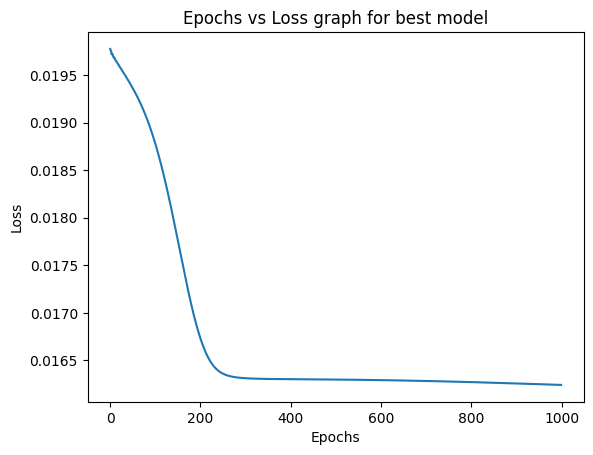

Training Losses for hidden layer 8
          0
0  0.154153
1  0.148839
2  0.143628
3  0.138524
4  0.133527
 RMSE for validation set is : 0.12804032411977315
 RMSE for test set is : 0.12568757081278775
Training Losses for hidden layer 16
          0
0  0.154652
1  0.145217
2  0.136159
3  0.127481
4  0.119185
 RMSE for validation set is : 0.1278153119325855
 RMSE for test set is : 0.12562120574231614
Training Losses for hidden layer 32
          0
0  0.628116
1  0.592805
2  0.558608
3  0.525537
4  0.493602
 RMSE for validation set is : 0.12793958785790507
 RMSE for test set is : 0.12567053447654886
Training Losses for hidden layer 64
          0
0  0.079878
1  0.061574
2  0.046687
3  0.035229
4  0.027122
 RMSE for validation set is : 0.1277861918769309
 RMSE for test set is : 0.1255636026268524
Training Losses for hidden layer 128
          0
0  0.033192
1  0.021522
2  0.021032
3  0.024772
4  0.025580
 RMSE for validation set is : 0.12782622660024695
 RMSE for test set is : 0.12558288570

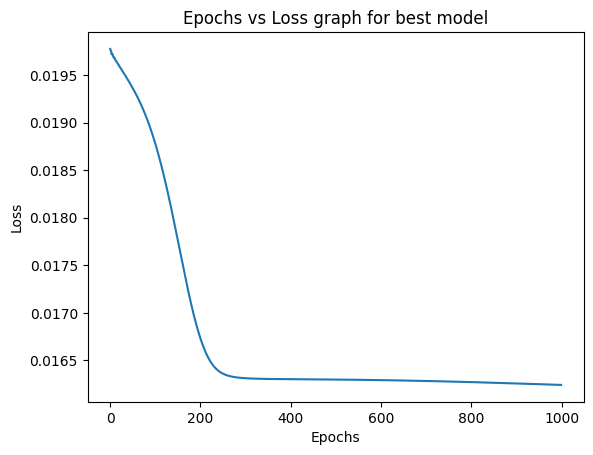

Training Losses for hidden layer 8
          0
0  0.551653
1  0.535183
2  0.519008
3  0.503132
4  0.487559
 RMSE for validation set is : 0.12824964188503438
 RMSE for test set is : 0.12581678356538195
Training Losses for hidden layer 16
          0
0  0.379813
1  0.356075
2  0.333179
3  0.311140
4  0.289970
 RMSE for validation set is : 0.12783035032421738
 RMSE for test set is : 0.12557770923100936
Training Losses for hidden layer 32
          0
0  0.035816
1  0.029005
2  0.024127
3  0.021139
4  0.019867
 RMSE for validation set is : 0.12779594302487648
 RMSE for test set is : 0.12554211333905754
Training Losses for hidden layer 64
          0
0  0.029192
1  0.022165
2  0.019956
3  0.021125
4  0.022782
 RMSE for validation set is : 0.12778026648861507
 RMSE for test set is : 0.12552890045971882
Training Losses for hidden layer 128
          0
0  0.200564
1  0.133512
2  0.082451
3  0.047233
4  0.026995
 RMSE for validation set is : 0.12779396807667426
 RMSE for test set is : 0.12557953

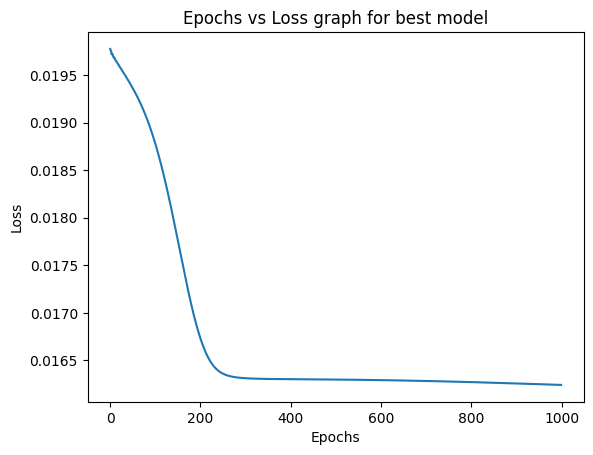

Training Losses for hidden layer 8
          0
0  0.050355
1  0.045486
2  0.041062
3  0.037087
4  0.033560
 RMSE for validation set is : 0.12781010199957762
 RMSE for test set is : 0.12554358959350123
Training Losses for hidden layer 16
          0
0  0.258191
1  0.238335
2  0.219416
3  0.201445
4  0.184433
 RMSE for validation set is : 0.12784438164647505
 RMSE for test set is : 0.12556998120356008
Training Losses for hidden layer 32
          0
0  0.810377
1  0.739952
2  0.672948
3  0.609431
4  0.549448
 RMSE for validation set is : 0.12783528987499237
 RMSE for test set is : 0.1255813357517187
Training Losses for hidden layer 64
          0
0  0.019408
1  0.022941
2  0.019595
3  0.020136
4  0.021355
 RMSE for validation set is : 0.127760782924251
 RMSE for test set is : 0.12553527338086767
Training Losses for hidden layer 128
          0
0  0.101310
1  0.051249
2  0.025108
3  0.020118
4  0.028361
 RMSE for validation set is : 0.12782692603982937
 RMSE for test set is : 0.12553472438

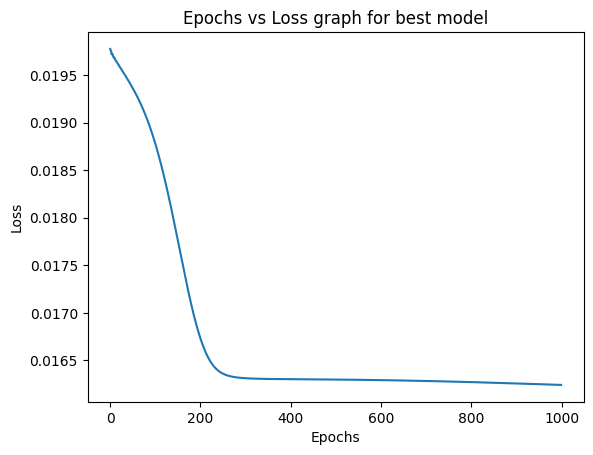

Training Losses for hidden layer 8
          0
0  1.004399
1  0.931700
2  0.862194
3  0.796006
4  0.733225
 RMSE for validation set is : 0.12839558627517322
 RMSE for test set is : 0.12587686778238794
Training Losses for hidden layer 16
          0
0  0.205864
1  0.174691
2  0.146526
3  0.121426
4  0.099409
 RMSE for validation set is : 0.12783740988913125
 RMSE for test set is : 0.12557177604696268
Training Losses for hidden layer 32
          0
0  0.020099
1  0.021516
2  0.019947
3  0.019669
4  0.020392
 RMSE for validation set is : 0.1277971819066948
 RMSE for test set is : 0.12554128247465077
Training Losses for hidden layer 64
          0
0  0.362821
1  0.264617
2  0.183770
3  0.120194
4  0.073371
 RMSE for validation set is : 0.12782099525367707
 RMSE for test set is : 0.12558519205966723
Training Losses for hidden layer 128
          0
0  0.185311
1  0.083230
2  0.030547
3  0.020996
4  0.037883
 RMSE for validation set is : 0.12780618165821303
 RMSE for test set is : 0.125563038

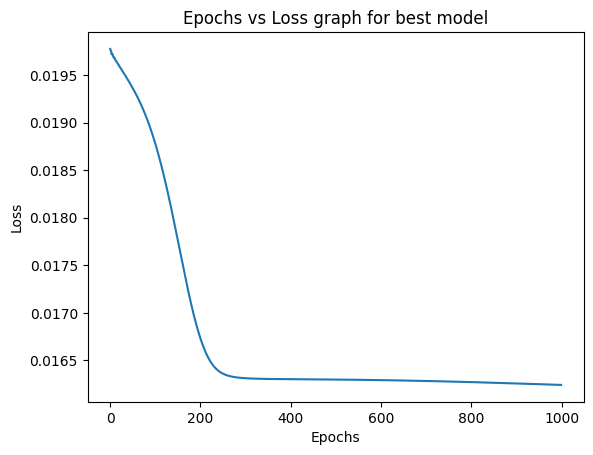

The Least Validation is 0.1277115177270407 for Hidden Layer of Size 8 & 16


In [24]:
nuerons = [8,16,32,64,128]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [25]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(10, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  0.596209
1  0.586010
2  0.575924
3  0.565953
4  0.556095
 RMSE for validation set is : 0.13726065731449671 for combination 8 & 8 & 8
 RMSE for test set is : 0.1347931612603559 for combination 8 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.527232
1  0.511549
2  0.496108
3  0.480913
4  0.465970
 RMSE for validation set is : 0.1344859358381285 for combination 8 & 8 & 16
 RMSE for test set is : 0.13200441827071663 for combination 8 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.031129
1  0.027116
2  0.024005
3  0.021790
4  0.020430
 RMSE for validation set is : 0.12774570718129427 for combination 8 & 8 & 32
 RMSE for test set is : 0.1255677561554624 for combination 8 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.240230
1  0.205712
2  0.174204
3  0.145752
4  0.120385
 RMSE for validation set is : 0.12794059968956825 for combination 8 & 8 & 64
 RMSE for test set is : 0.12574640585159771 for combi

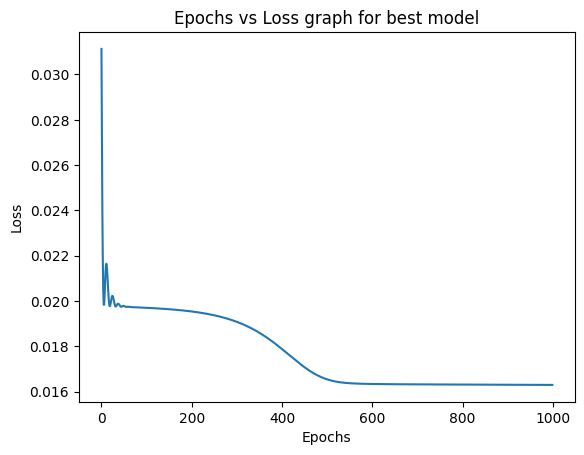

Training Losses for hidden layer 8
          0
0  1.380117
1  1.357976
2  1.336099
3  1.314489
4  1.293147
 RMSE for validation set is : 0.13744908495550207 for combination 8 & 16 & 8
 RMSE for test set is : 0.13499376088312828 for combination 8 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.020358
1  0.019861
2  0.019758
3  0.019884
4  0.019978
 RMSE for validation set is : 0.12771128437025234 for combination 8 & 16 & 16
 RMSE for test set is : 0.1255234027206497 for combination 8 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.507523
1  0.475889
2  0.445379
3  0.416005
4  0.387780
 RMSE for validation set is : 0.1290667863600489 for combination 8 & 16 & 32
 RMSE for test set is : 0.12663966875697774 for combination 8 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.330439
1  0.284216
2  0.241873
3  0.203451
4  0.168969
 RMSE for validation set is : 0.12819980176515697 for combination 8 & 16 & 64
 RMSE for test set is : 0.1258254660611206 fo

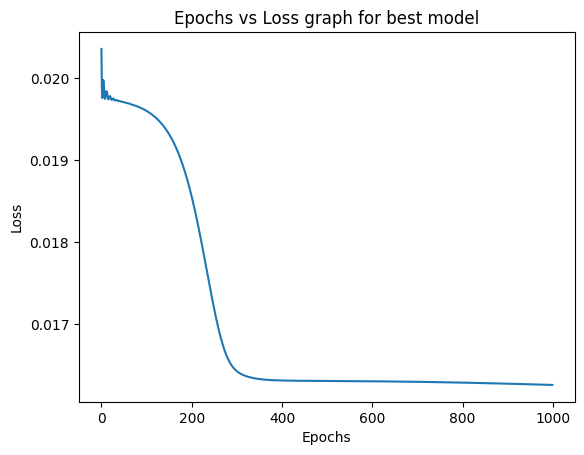

Training Losses for hidden layer 8
          0
0  0.317728
1  0.304842
2  0.292249
3  0.279955
4  0.267965
 RMSE for validation set is : 0.1309596289733351 for combination 8 & 32 & 8
 RMSE for test set is : 0.1284581908268942 for combination 8 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.075571
1  0.066805
2  0.058806
3  0.051585
4  0.045150
 RMSE for validation set is : 0.12774071313141225 for combination 8 & 32 & 16
 RMSE for test set is : 0.12555424184971117 for combination 8 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.075730
1  0.062066
2  0.050387
3  0.040704
4  0.032995
 RMSE for validation set is : 0.12774098288799987 for combination 8 & 32 & 32
 RMSE for test set is : 0.12553049557511145 for combination 8 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.104938
1  0.079263
2  0.058368
3  0.042234
4  0.030730
 RMSE for validation set is : 0.12772975469976625 for combination 8 & 32 & 64
 RMSE for test set is : 0.1255500582022629 fo

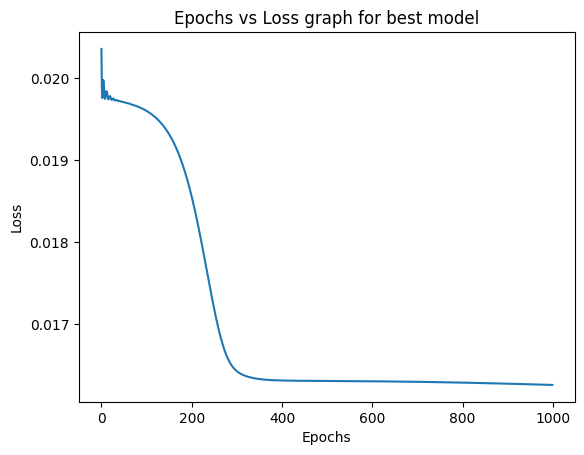

Training Losses for hidden layer 8
          0
0  0.046770
1  0.042201
2  0.038057
3  0.034349
4  0.031083
 RMSE for validation set is : 0.1277508468389904 for combination 8 & 64 & 8
 RMSE for test set is : 0.12556340236396538 for combination 8 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.094598
1  0.082634
2  0.071725
3  0.061892
4  0.053144
 RMSE for validation set is : 0.1277388612735132 for combination 8 & 64 & 16
 RMSE for test set is : 0.12556948427957101 for combination 8 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.219673
1  0.184457
2  0.152800
3  0.124738
4  0.100275
 RMSE for validation set is : 0.12774566343863922 for combination 8 & 64 & 32
 RMSE for test set is : 0.12556912827311603 for combination 8 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.132264
1  0.093431
2  0.063113
3  0.041230
4  0.027400
 RMSE for validation set is : 0.12775118947548472 for combination 8 & 64 & 64
 RMSE for test set is : 0.12552883368700454 f

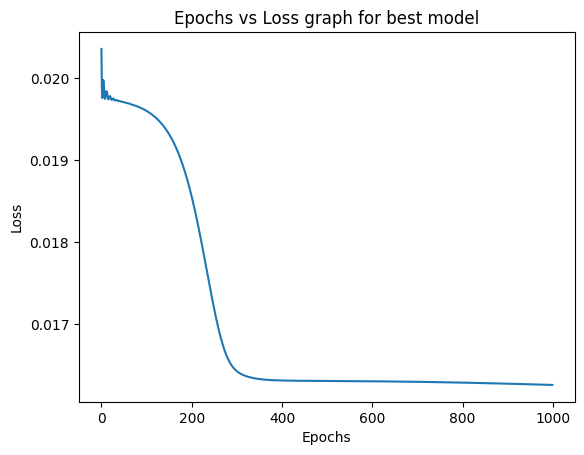

Training Losses for hidden layer 8
          0
0  0.188504
1  0.182886
2  0.177363
3  0.171937
4  0.166609
 RMSE for validation set is : 0.13010696200316932 for combination 16 & 8 & 8
 RMSE for test set is : 0.12762724820108093 for combination 16 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.066833
1  0.061237
2  0.056006
3  0.051148
4  0.046664
 RMSE for validation set is : 0.12776768597096025 for combination 16 & 8 & 16
 RMSE for test set is : 0.12559274118126978 for combination 16 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.595153
1  0.565241
2  0.536177
3  0.507968
4  0.480623
 RMSE for validation set is : 0.13054770033944724 for combination 16 & 8 & 32
 RMSE for test set is : 0.1280759673965922 for combination 16 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.022120
1  0.019905
2  0.020156
3  0.020848
4  0.020717
 RMSE for validation set is : 0.1277169650284202 for combination 16 & 8 & 64
 RMSE for test set is : 0.12552058327387466 f

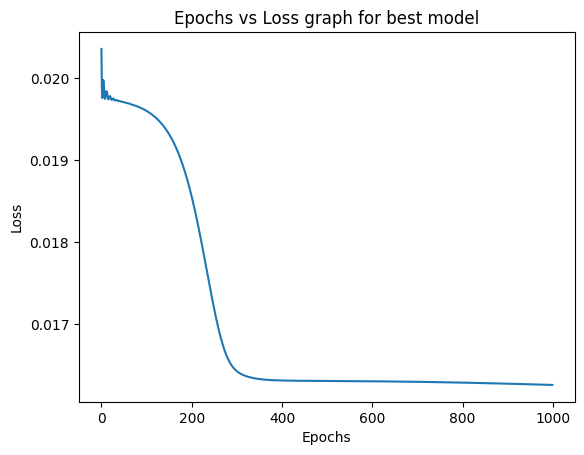

Training Losses for hidden layer 8
          0
0  0.142665
1  0.136309
2  0.130121
3  0.124104
4  0.118259
 RMSE for validation set is : 0.1280659612264227 for combination 16 & 16 & 8
 RMSE for test set is : 0.125704849330913 for combination 16 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.020271
1  0.019833
2  0.019862
3  0.020001
4  0.019991
 RMSE for validation set is : 0.12765466086753738 for combination 16 & 16 & 16
 RMSE for test set is : 0.12551538939034226 for combination 16 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.050581
1  0.043116
2  0.036733
3  0.031433
4  0.027201
 RMSE for validation set is : 0.12774889306439877 for combination 16 & 16 & 32
 RMSE for test set is : 0.12556138488299048 for combination 16 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.416231
1  0.365736
2  0.318777
3  0.275404
4  0.235653
 RMSE for validation set is : 0.12781912998640826 for combination 16 & 16 & 64
 RMSE for test set is : 0.1256096249513

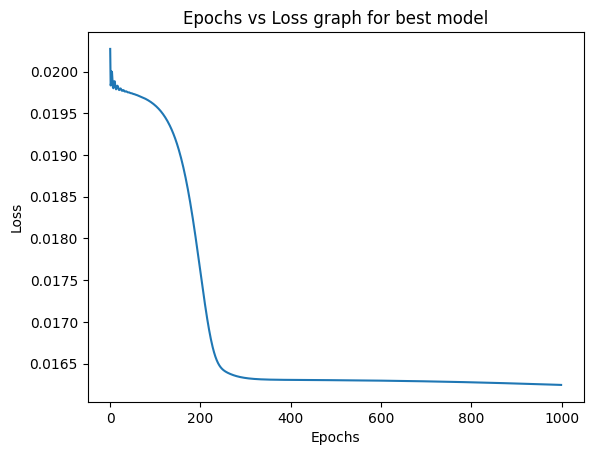

Training Losses for hidden layer 8
          0
0  0.156586
1  0.149234
2  0.142117
3  0.135237
4  0.128592
 RMSE for validation set is : 0.12818799621750096 for combination 16 & 32 & 8
 RMSE for test set is : 0.12582312710162252 for combination 16 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.020208
1  0.019781
2  0.019958
3  0.020013
4  0.019886
 RMSE for validation set is : 0.1276561345785079 for combination 16 & 32 & 16
 RMSE for test set is : 0.1254490817106527 for combination 16 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.040455
1  0.032457
2  0.026494
3  0.022517
4  0.020377
 RMSE for validation set is : 0.1277304182110551 for combination 16 & 32 & 32
 RMSE for test set is : 0.12552047197862373 for combination 16 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.094340
1  0.069227
2  0.049453
3  0.034977
4  0.025583
 RMSE for validation set is : 0.12776658529895982 for combination 16 & 32 & 64
 RMSE for test set is : 0.1255394501024

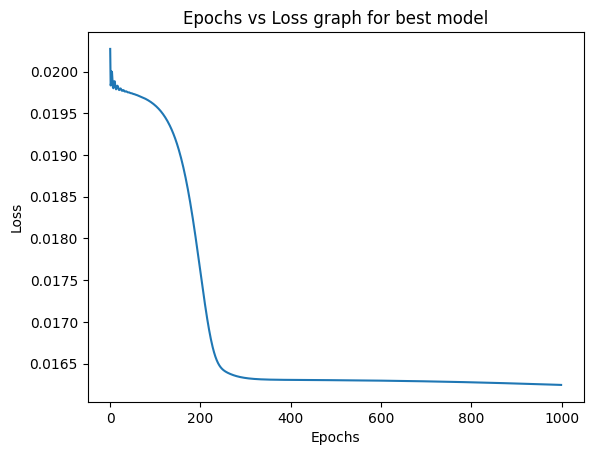

Training Losses for hidden layer 8
          0
0  0.492192
1  0.469503
2  0.447449
3  0.426041
4  0.405290
 RMSE for validation set is : 0.13229310630655797 for combination 16 & 64 & 8
 RMSE for test set is : 0.12970769162003473 for combination 16 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.083121
1  0.068641
2  0.056114
3  0.045553
4  0.036944
 RMSE for validation set is : 0.12775278600362844 for combination 16 & 64 & 16
 RMSE for test set is : 0.12552021228932111 for combination 16 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.325394
1  0.281954
2  0.241993
3  0.205548
4  0.172637
 RMSE for validation set is : 0.1278082875814408 for combination 16 & 64 & 32
 RMSE for test set is : 0.12553483567020501 for combination 16 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.275761
1  0.209254
2  0.153132
3  0.107425
4  0.071980
 RMSE for validation set is : 0.12777697205793392 for combination 16 & 64 & 64
 RMSE for test set is : 0.12554760284

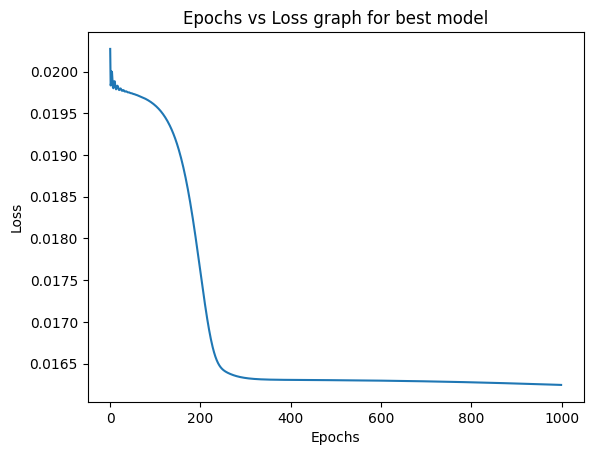

Training Losses for hidden layer 8
          0
0  0.269141
1  0.261717
2  0.254422
3  0.247257
4  0.240224
 RMSE for validation set is : 0.13031962089384785 for combination 32 & 8 & 8
 RMSE for test set is : 0.12777261336645968 for combination 32 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.042571
1  0.039015
2  0.035762
3  0.032820
4  0.030192
 RMSE for validation set is : 0.12773657193175725 for combination 32 & 8 & 16
 RMSE for test set is : 0.12557135329690064 for combination 32 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.332700
1  0.309402
2  0.287057
3  0.265666
4  0.245238
 RMSE for validation set is : 0.12794410100212958 for combination 32 & 8 & 32
 RMSE for test set is : 0.1257369623938381 for combination 32 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.066140
1  0.051570
2  0.039839
3  0.030944
4  0.024801
 RMSE for validation set is : 0.12771934951695654 for combination 32 & 8 & 64
 RMSE for test set is : 0.12557681185491562 

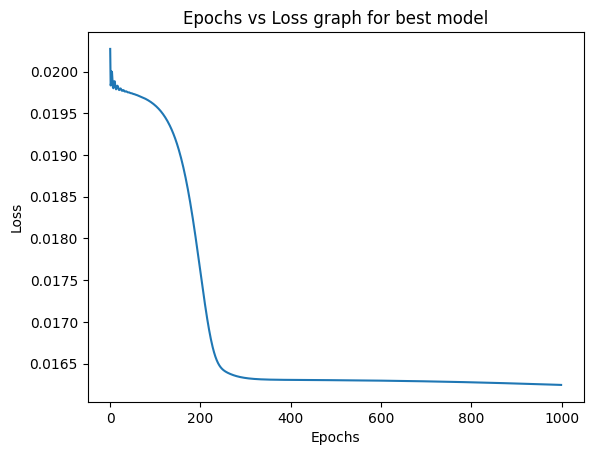

Training Losses for hidden layer 8
          0
0  0.735522
1  0.716660
2  0.698106
3  0.679863
4  0.661931
 RMSE for validation set is : 0.13238459262005625 for combination 32 & 16 & 8
 RMSE for test set is : 0.12978141813728875 for combination 32 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.199060
1  0.188121
2  0.177523
3  0.167274
4  0.157380
 RMSE for validation set is : 0.127962501336057 for combination 32 & 16 & 16
 RMSE for test set is : 0.12561319865122514 for combination 32 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.411058
1  0.380936
2  0.352088
3  0.324530
4  0.298275
 RMSE for validation set is : 0.12790360803715864 for combination 32 & 16 & 32
 RMSE for test set is : 0.12561055175053518 for combination 32 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.029214
1  0.022762
2  0.019992
3  0.020204
4  0.021692
 RMSE for validation set is : 0.1277001046220624 for combination 32 & 16 & 64
 RMSE for test set is : 0.1255465272140

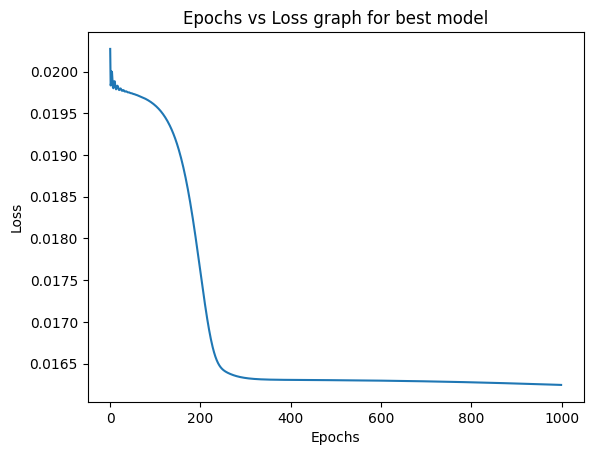

Training Losses for hidden layer 8
          0
0  0.089985
1  0.083843
2  0.077979
3  0.072401
4  0.067113
 RMSE for validation set is : 0.12776671650539143 for combination 32 & 32 & 8
 RMSE for test set is : 0.12553441279574246 for combination 32 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.072271
1  0.063816
2  0.056120
3  0.049197
4  0.043053
 RMSE for validation set is : 0.12774149323674247 for combination 32 & 32 & 16
 RMSE for test set is : 0.12553378960972753 for combination 32 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.119164
1  0.101362
2  0.085341
3  0.071131
4  0.058750
 RMSE for validation set is : 0.12775098535172644 for combination 32 & 32 & 32
 RMSE for test set is : 0.125543181585215 for combination 32 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.260852
1  0.213300
2  0.171159
3  0.134472
4  0.103230
 RMSE for validation set is : 0.12775724742855182 for combination 32 & 32 & 64
 RMSE for test set is : 0.125540533208

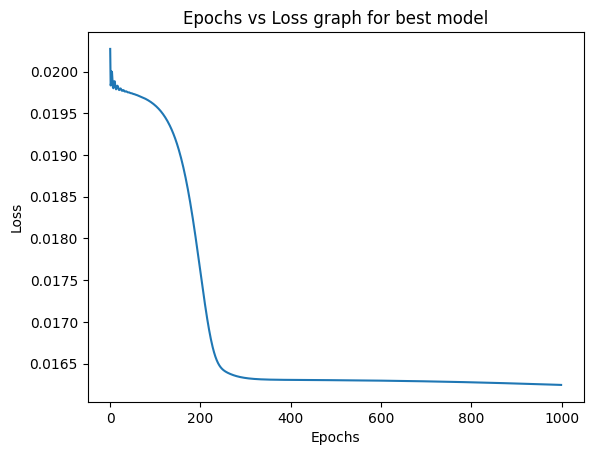

Training Losses for hidden layer 8
          0
0  0.907766
1  0.870051
2  0.833337
3  0.797639
4  0.762970
 RMSE for validation set is : 0.1335315453561578 for combination 32 & 64 & 8
 RMSE for test set is : 0.13088187693241754 for combination 32 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.176203
1  0.155564
2  0.136499
3  0.119016
4  0.103116
 RMSE for validation set is : 0.12783727875525613 for combination 32 & 64 & 16
 RMSE for test set is : 0.12552335820356111 for combination 32 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.020128
1  0.020333
2  0.020058
3  0.019832
4  0.020030
 RMSE for validation set is : 0.12765315066092214 for combination 32 & 64 & 32
 RMSE for test set is : 0.12557556590061542 for combination 32 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.360409
1  0.281824
2  0.213922
3  0.156751
4  0.110232
 RMSE for validation set is : 0.12774801823026957 for combination 32 & 64 & 64
 RMSE for test set is : 0.12554079285

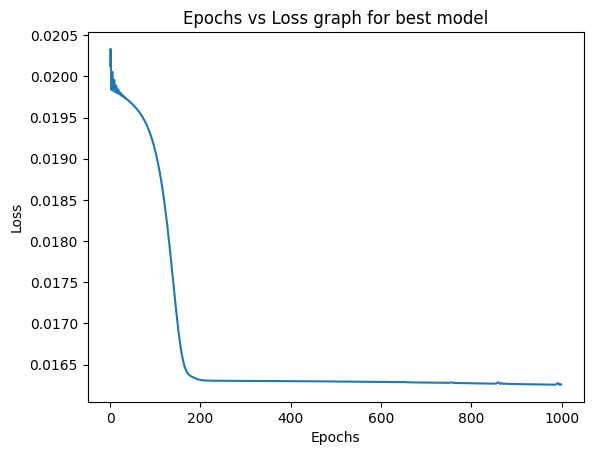

Training Losses for hidden layer 8
          0
0  0.359274
1  0.350385
2  0.341616
3  0.332971
4  0.324453
 RMSE for validation set is : 0.13350978298363766 for combination 64 & 8 & 8
 RMSE for test set is : 0.13085538231751076 for combination 64 & 8 & 8
Training Losses for hidden layer 16
          0
0  0.063304
1  0.058008
2  0.053078
3  0.048518
4  0.044327
 RMSE for validation set is : 0.12775912088897434 for combination 64 & 8 & 16
 RMSE for test set is : 0.12556659911486964 for combination 64 & 8 & 16
Training Losses for hidden layer 32
          0
0  0.319078
1  0.294842
2  0.271663
3  0.249559
4  0.228544
 RMSE for validation set is : 0.12783773772323048 for combination 64 & 8 & 32
 RMSE for test set is : 0.12569017904320157 for combination 64 & 8 & 32
Training Losses for hidden layer 64
          0
0  0.495631
1  0.444026
2  0.395521
3  0.350149
4  0.307933
 RMSE for validation set is : 0.1278253814389786 for combination 64 & 8 & 64
 RMSE for test set is : 0.12563208122365577 

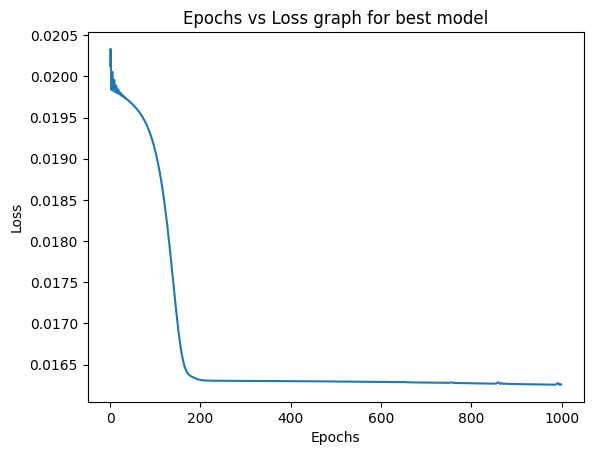

Training Losses for hidden layer 8
          0
0  0.021596
1  0.020812
2  0.020251
3  0.019911
4  0.019771
 RMSE for validation set is : 0.12766032215939996 for combination 64 & 16 & 8
 RMSE for test set is : 0.12550695258141903 for combination 64 & 16 & 8
Training Losses for hidden layer 16
          0
0  0.107754
1  0.099267
2  0.091227
3  0.083641
4  0.076513
 RMSE for validation set is : 0.12776261988545473 for combination 64 & 16 & 16
 RMSE for test set is : 0.12554406436511054 for combination 64 & 16 & 16
Training Losses for hidden layer 32
          0
0  0.024926
1  0.021871
2  0.020194
3  0.019758
4  0.020161
 RMSE for validation set is : 0.12765707570185983 for combination 64 & 16 & 32
 RMSE for test set is : 0.12548680434489679 for combination 64 & 16 & 32
Training Losses for hidden layer 64
          0
0  0.175794
1  0.142044
2  0.112591
3  0.087456
4  0.066605
 RMSE for validation set is : 0.1277569339675103 for combination 64 & 16 & 64
 RMSE for test set is : 0.12556150355

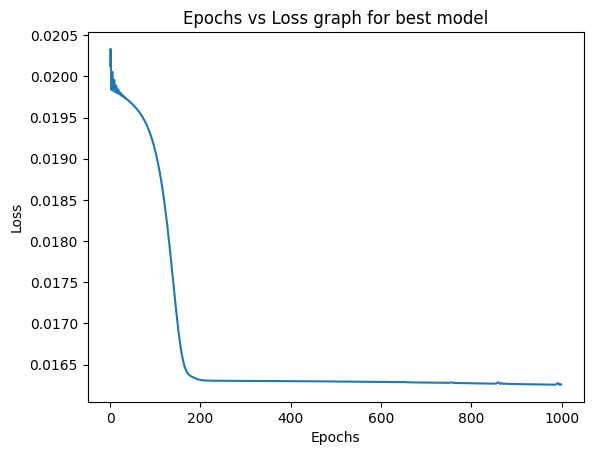

Training Losses for hidden layer 8
          0
0  0.489049
1  0.470054
2  0.451527
3  0.433478
4  0.415917
 RMSE for validation set is : 0.13155357357740385 for combination 64 & 32 & 8
 RMSE for test set is : 0.12886084132483666 for combination 64 & 32 & 8
Training Losses for hidden layer 16
          0
0  0.352864
1  0.330380
2  0.308708
3  0.287863
4  0.267855
 RMSE for validation set is : 0.12799360411187818 for combination 64 & 32 & 16
 RMSE for test set is : 0.12560269227694004 for combination 64 & 32 & 16
Training Losses for hidden layer 32
          0
0  0.175447
1  0.153699
2  0.133667
3  0.115363
4  0.098789
 RMSE for validation set is : 0.12776792651390972 for combination 64 & 32 & 32
 RMSE for test set is : 0.12554835948291967 for combination 64 & 32 & 32
Training Losses for hidden layer 64
          0
0  0.220755
1  0.176039
2  0.137111
3  0.104028
4  0.076777
 RMSE for validation set is : 0.127741930676899 for combination 64 & 32 & 64
 RMSE for test set is : 0.125538233451

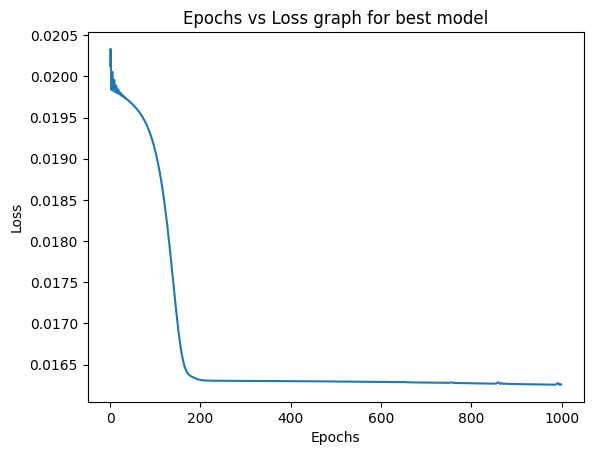

Training Losses for hidden layer 8
          0
0  0.241532
1  0.221292
2  0.202045
3  0.183821
4  0.166641
 RMSE for validation set is : 0.12805780881943638 for combination 64 & 64 & 8
 RMSE for test set is : 0.125625972684729 for combination 64 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.118780
1  0.099289
2  0.082031
3  0.067021
4  0.054248
 RMSE for validation set is : 0.12777281745566607 for combination 64 & 64 & 16
 RMSE for test set is : 0.12551079633426707 for combination 64 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.622774
1  0.553241
2  0.488221
3  0.427772
4  0.371913
 RMSE for validation set is : 0.12786812793560426 for combination 64 & 64 & 32
 RMSE for test set is : 0.12554635659652627 for combination 64 & 64 & 32
Training Losses for hidden layer 64
          0
0  0.117535
1  0.080224
2  0.052115
3  0.033118
4  0.022721
 RMSE for validation set is : 0.12775299741453508 for combination 64 & 64 & 64
 RMSE for test set is : 0.125534865345

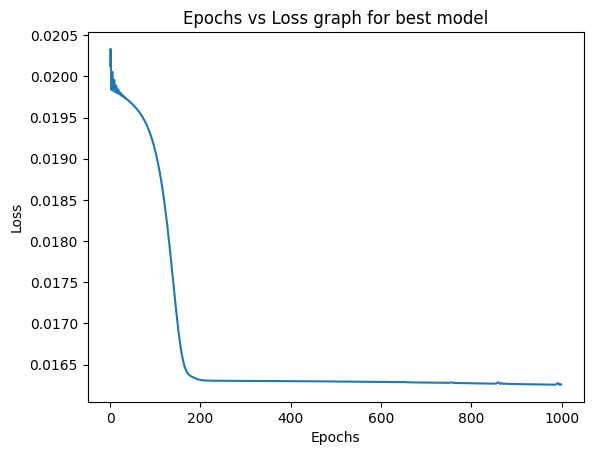

The Least Validation is 0.12765315066092214 for Hidden Layer of Size 32 & 64 & 32


In [26]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [27]:
model = SingleLayer(hidden1=8)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


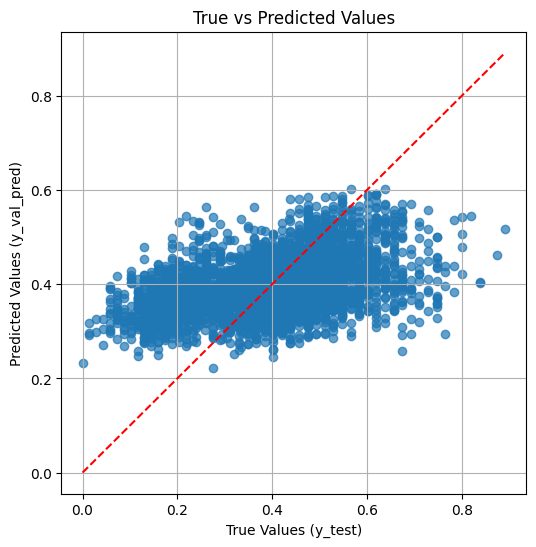

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [29]:
model = DoubleLayer(hidden1=8,hidden2 = 16)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


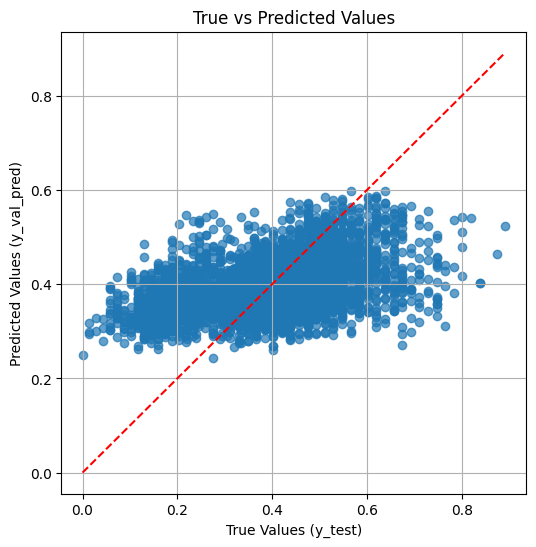

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [31]:
model = TripleLayer(hidden1=32,hidden2 = 64, hidden3=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


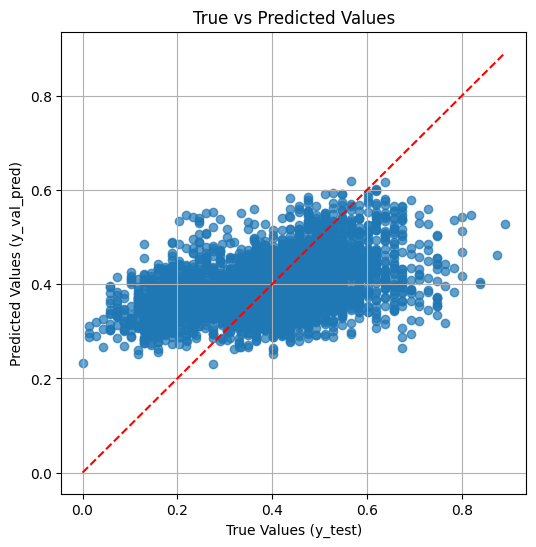

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()